In [0]:
# Mount the G drive

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Check the dataset**

In [35]:
train_data2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/Word2Vec/Movie_rating_data/ratings_test.txt', header = 0, delimiter = '\t')
train_data2.head()


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [17]:
print(f'Total number of the train data: {len(train_data)}')
train_lenght = train_data2['document'].astype(str).apply(len)
train_lenght.head()

Total number of the train data: 150000


0     3
1    20
2    38
3    32
4    49
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

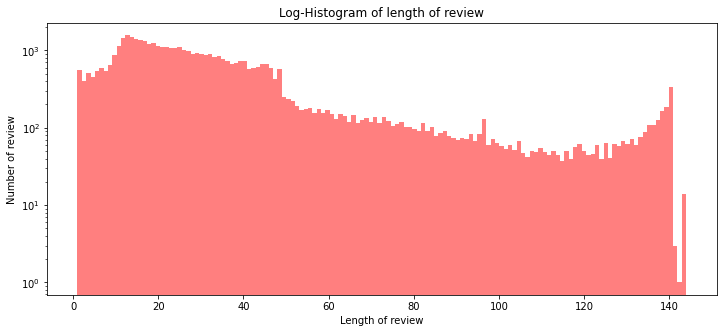

In [36]:
plt.figure(figsize=(12, 5))
plt.hist(train_lenght, bins=140, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [33]:
print(f'Maximum Review Length: {np.max(train_lenght)}'.format())
print(f'Minimum Review Length: {np.min(train_lenght)}')
print(f'Average Review Length: {np.mean(train_lenght):.2f}')

Maximum Review Length: 144
Minimum Review Length: 1
Average Review Length: 35.32


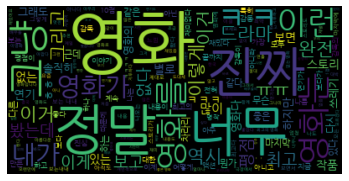

In [39]:
train_review = [review for review in train_data2['document'] if type(review) is str]
font_path = '/content/gdrive/My Drive/Colab Notebooks/GraduationProject/나눔고딕.ttf'
wordcloud = WordCloud(font_path=font_path).generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

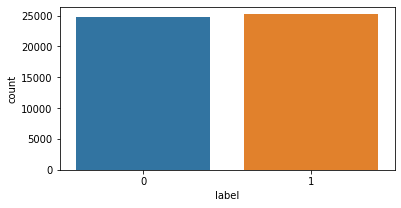

In [25]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data2['label'])

In [26]:
print(f"The number of the Positive reviews: {train_data2['label'].value_counts()[1]}")
print(f"The number of the Negative reviews: {train_data2['label'].value_counts()[0]}")

The number of the Positive reviews: 25173
The number of the Negative reviews: 24827


# **Embedding the Word using Word2Vec - Skip gram**

In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.9MB/s 
     |████████████████████████████████| 2.9MB 45.1MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [20]:
%tensorflow_version 1.x
import os
from konlpy.tag import Okt
import gensim 
import tensorflow as tf
import numpy as np
import codecs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
os.chdir("/content/gdrive/My Drive/Colab Notebooks/GraduationProject/Word2Vec/Movie_rating_data")

In [0]:
def read_data(filename):    
    with open(filename, 'r',encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]        
        data = data[1:]   # header 제외 #    
    return data 

In [0]:
train_data = read_data('ratings_train.txt') 
test_data = read_data('ratings_test.txt') 

**Tokenizing**

In [0]:
pos_tagger = Okt() 

In [0]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [0]:
## training Word2Vec model using skip-gram 
  
tokens = [tokenize(row[1]) for row in train_data]
model = gensim.models.Word2Vec(size=300, sg = 1, alpha=0.025, min_alpha=0.025, seed=1234)
model.build_vocab(tokens)

for epoch in range(30):
           
    model.train(tokens,total_examples=model.corpus_count,epochs = model.iter)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

In [0]:
token

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/Word2Vec/Word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# **Load the model**

In [0]:
model = gensim.models.Word2Vec.load('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/Word2Vec/Word2vec.model')

NameError: ignored

In [0]:
model.most_similar('팝콘/Noun',topn = 20)  ## topn = len(model.wv.vocab)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('콜라/Noun', 0.5111452341079712),
 ('시간/Noun', 0.4779089093208313),
 ('액션/Noun', 0.4724131226539612),
 ('보다/Verb', 0.4665835499763489),
 ('./Punctuation', 0.4645703434944153),
 ('ㅋㅋㅋ/KoreanParticle', 0.4627574682235718),
 ('재미/Noun', 0.456439733505249),
 ('너무/Adverb', 0.4562261998653412),
 ('흠칫/Noun', 0.450609415769577),
 ('꿀잼꿀잼/Noun', 0.450061559677124),
 ('본/Modifier', 0.4489935636520386),
 ('가족/Noun', 0.4477766454219818),
 ('진짜/Noun', 0.44593602418899536),
 ('력/Suffix', 0.443672239780426),
 ('아무/Modifier', 0.44362497329711914),
 ('들/Suffix', 0.443622350692749),
 ('정도/Noun', 0.44305944442749023),
 ('일기토/Noun', 0.4427022635936737),
 ('으로/Josa', 0.44255518913269043),
 ('지루하다/Adjective', 0.4421829581260681)]

In [0]:
model.doesnt_match("한국/Noun 일본/Noun 중국/Noun 서울/Noun 프랑스/Noun".split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'서울/Noun'

# **Visulaizing the model**

In [0]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
import pandas as pd
import matplotlib.font_manager as fm  

font_path = '/content/gdrive/My Drive/Colab Notebooks/GraduationProject/나눔고딕.ttf'
mpl.rcParams['axes.unicode_minus'] = False
model = g.Doc2Vec.load('/content/gdrive/My Drive/Colab Notebooks/GraduationProject/Word2Vec/Word2vec.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])

15409
[-0.14398694  0.32051817 -0.07272357  0.33900964  0.30330056 -0.3460223
  0.37530014 -0.0186035   0.28458685 -0.31426105]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
# Visualize only for 100 words only
# Decrease dimension

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [0]:
df.head(10)

,x,y
아/Exclamation,31.292679,-5.344634
더빙/Noun,19.323366,34.782597
../Punctuation,-0.542574,-3.601852
진짜/Noun,-8.499165,1.771723
짜증나다/Adjective,-1.959246,29.812416
목소리/Noun,-33.167313,-17.939184
흠/Noun,-50.469448,10.158695
.../Punctuation,0.065171,3.406574
포스터/Noun,-37.973129,-0.124866
보고/Noun,10.808712,-24.720543


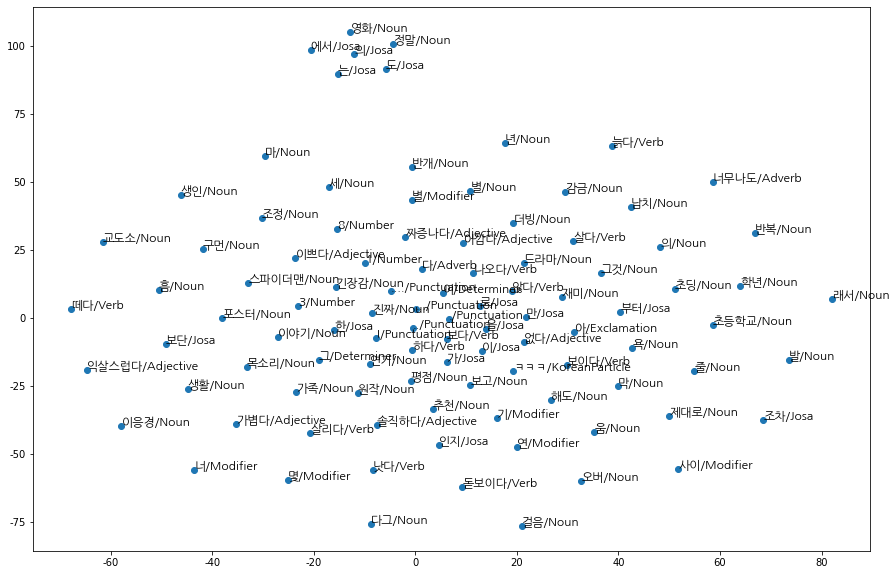

In [0]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_subplot(1, 1, 1)
fontprop = fm.FontProperties(fname=font_path, size=12)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()